<a href="https://colab.research.google.com/github/salinator-hub/floorplan-change-detection/blob/main/floorplan_change_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pdf2image pytesseract opencv-python opencv-python-headless

# Install Tesseract OCR
!apt-get install tesseract-ocr

# Update the PATH environment variable to include the Tesseract executable
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

import cv2
import numpy as np
from pdf2image import convert_from_bytes
import pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (13.3 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [6]:
# Install Poppler for PDF processing
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (326 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121796 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


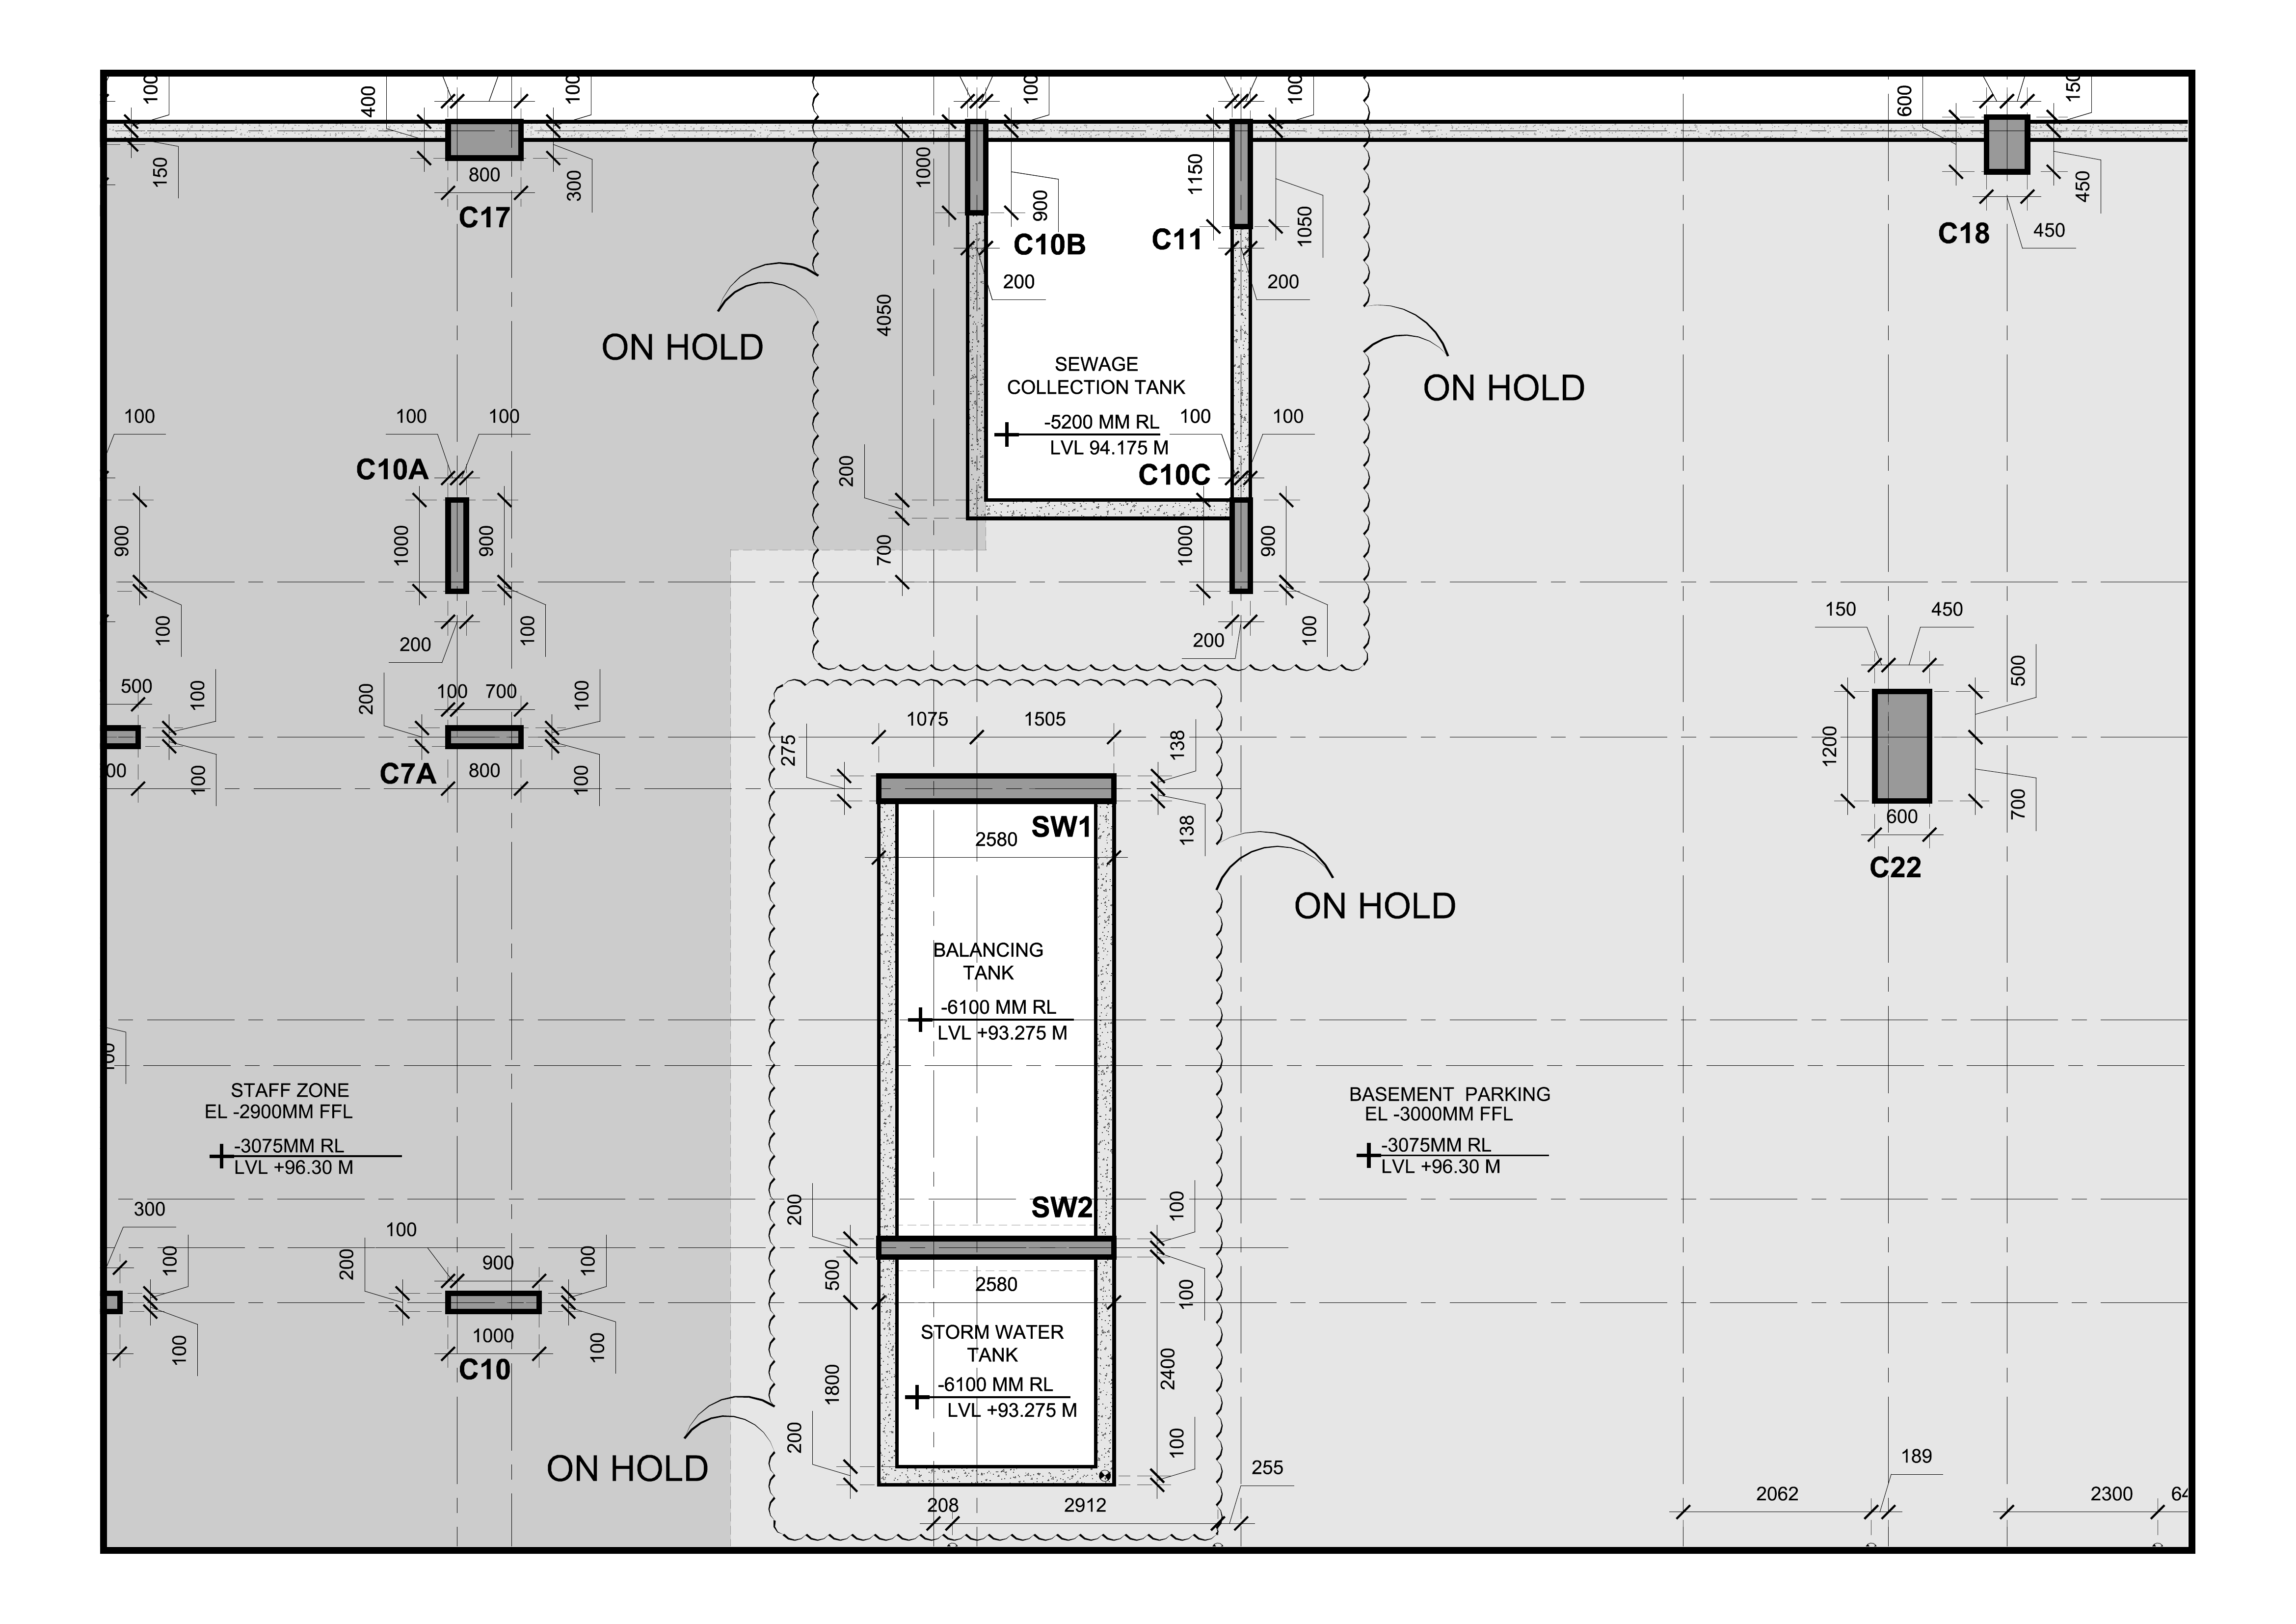

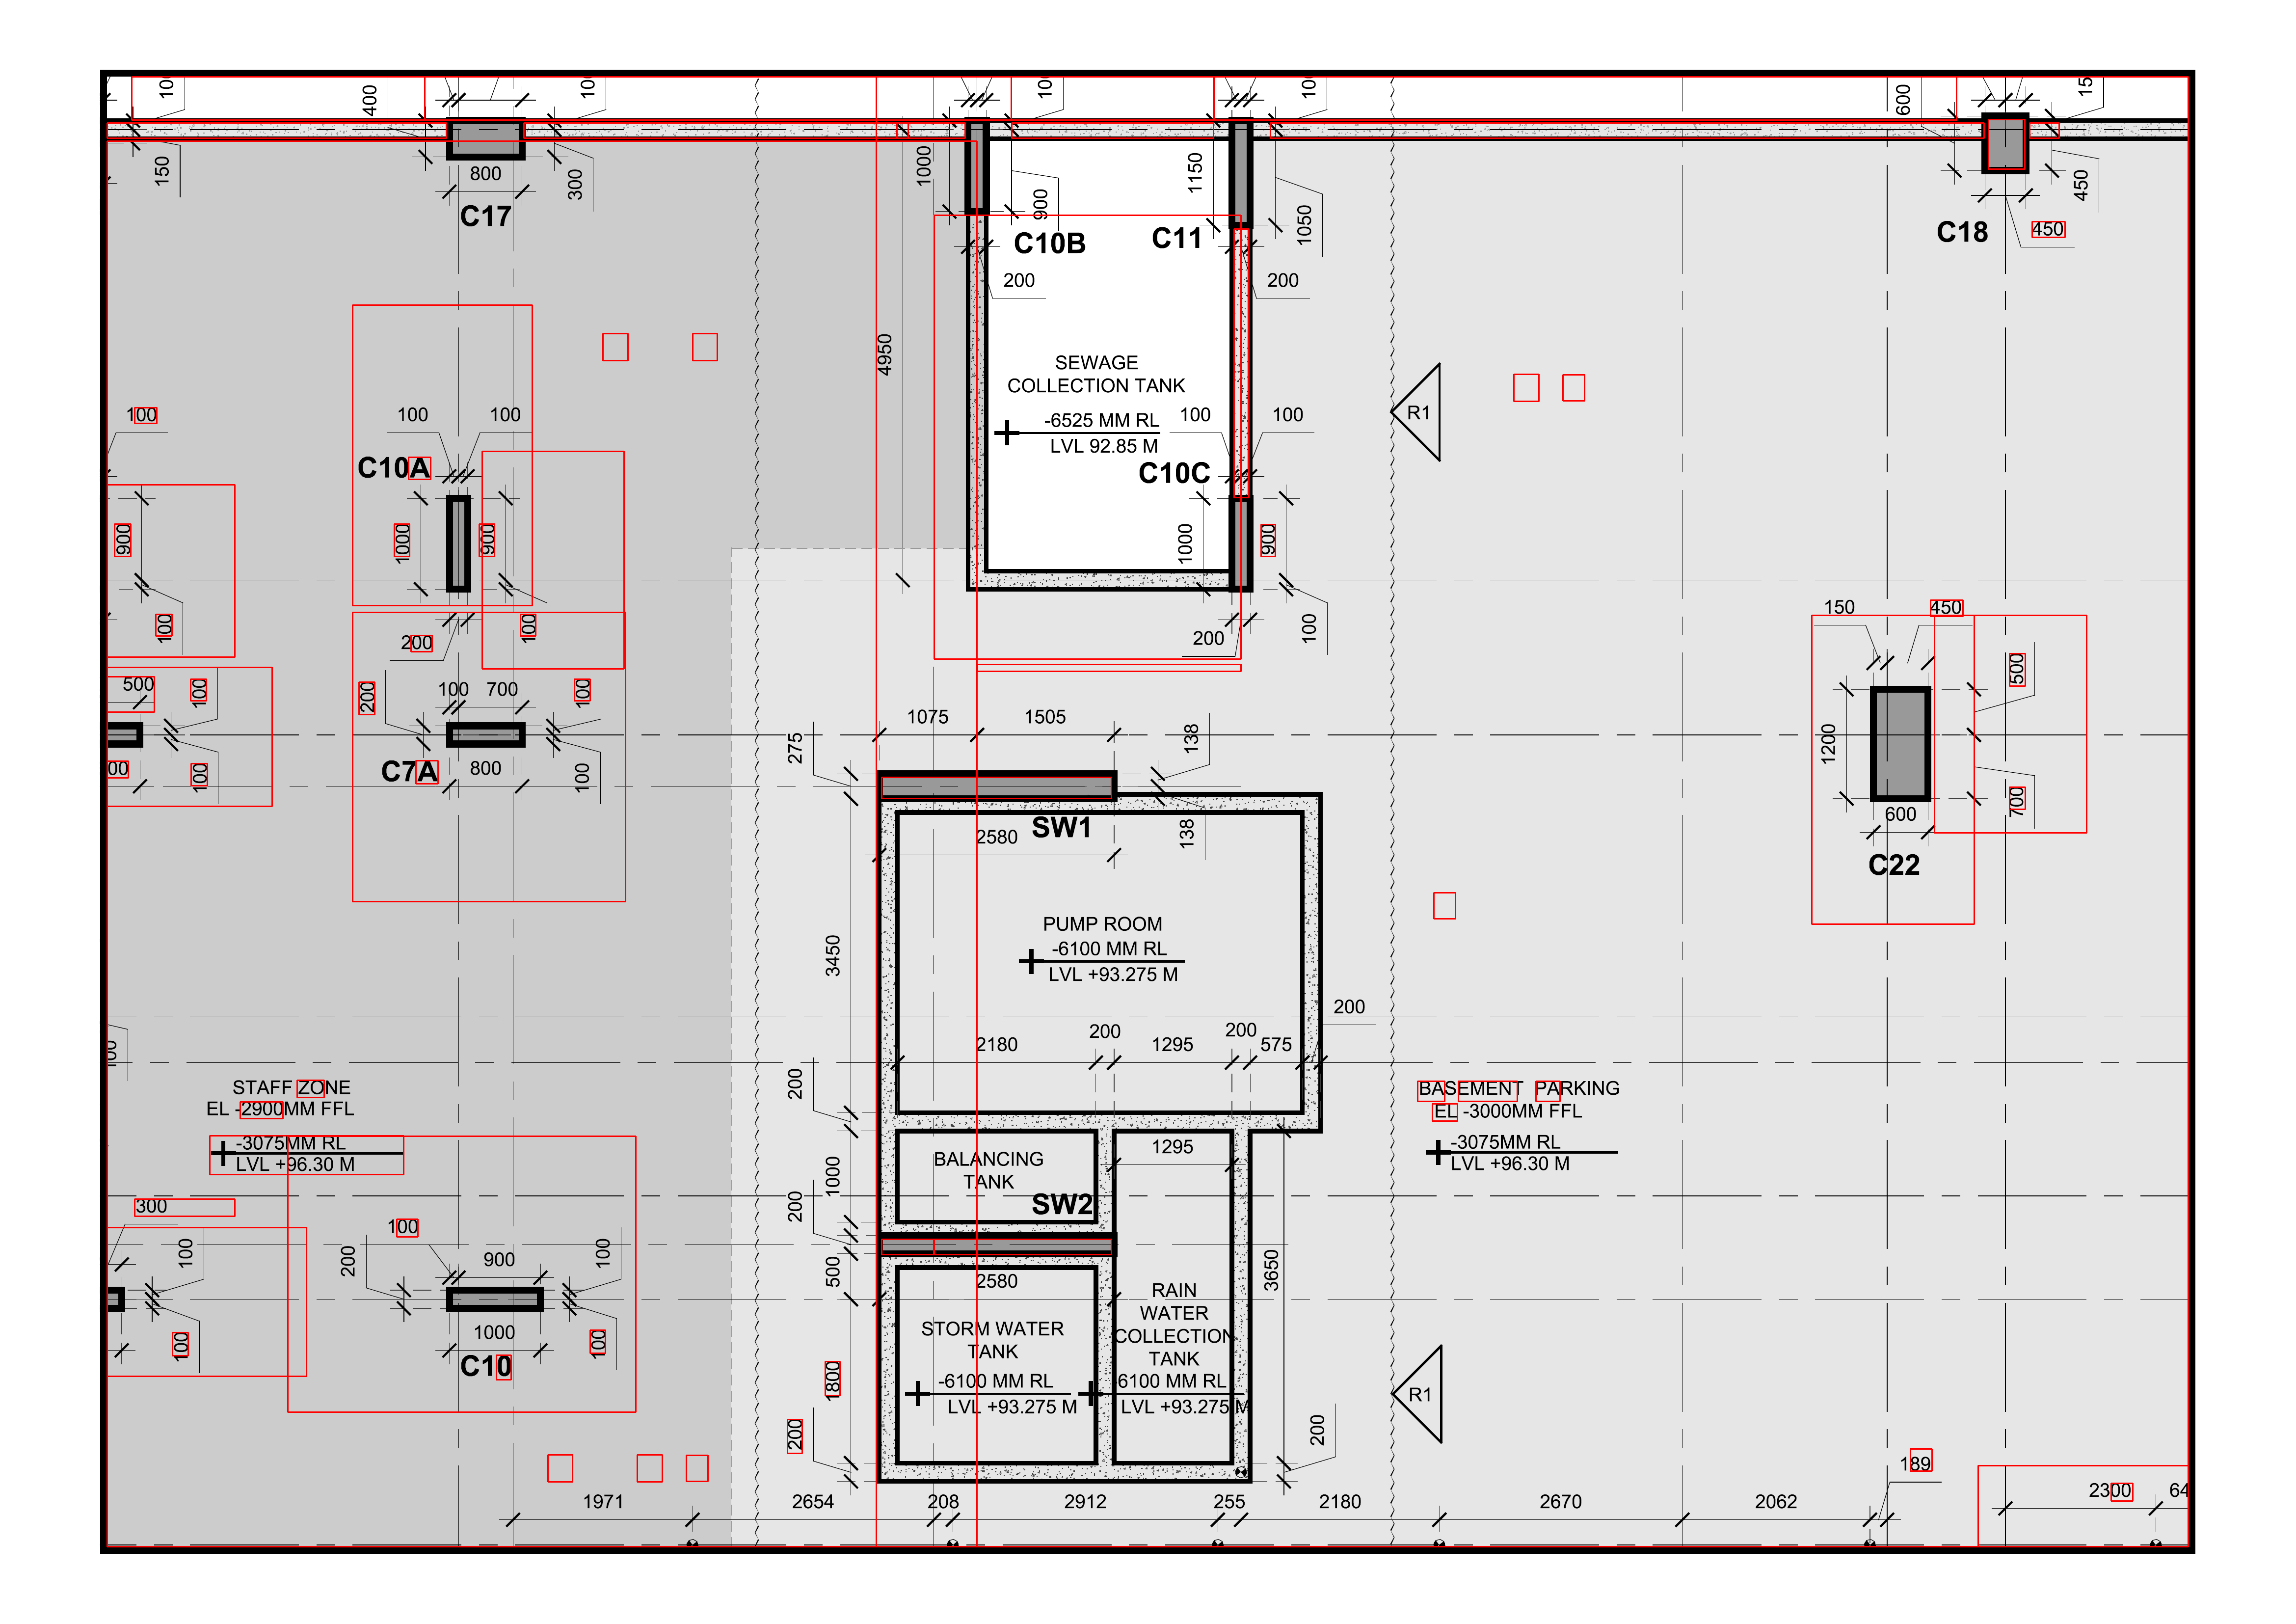

In [22]:
from google.colab.patches import cv2_imshow

def pdf_to_image(pdf_bytes):
    image = convert_from_bytes(pdf_bytes)[0]  # Assuming only one page per PDF
    return np.array(image)

def extract_text(image):
    return pytesseract.image_to_string(image)

def detect_layout_changes(image1, image2):
  """Detects layout changes between two images and highlights them with bounding boxes.

  Args:
    image1: The first image as a NumPy array.
    image2: The second image as a NumPy array.

  Returns:
    A tuple containing two NumPy arrays:
      - The first image (unchanged).
      - The second image with highlighted changes.
  """

  # Convert images to grayscale for robust change detection
  gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur for noise reduction (optional)
  # gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)
  # gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)  # Uncomment if needed

  # Compute absolute difference between the grayscale images
  diff = cv2.absdiff(gray1, gray2)

  # Threshold the difference image to isolate significant changes
  _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)  # Adjust threshold

  # Find contours in the binary mask
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a copy of the second image for drawing highlights
  highlight_image2 = image2.copy()

  # Draw bounding boxes around changed regions
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Highlight only significant changes (adjust threshold as needed)
    if cv2.contourArea(contour) > 1000:
      cv2.rectangle(highlight_image2, (x, y), (x + w, y + h), (0, 0, 255), 2)

  return image1, highlight_image2


# Access file 1 and file 2 directly from Colab files
file1_path = "/file_1.pdf"  # Update with the correct file path
file2_path = "/file_2.pdf"  # Update with the correct file path

# Convert PDFs to images
image1 = pdf_to_image(open(file1_path, 'rb').read())
image2 = pdf_to_image(open(file2_path, 'rb').read())

# Detect layout changes between images
image1_highlighted, image2_highlighted = detect_layout_changes(image1.copy(), image2.copy())

# Print both images with changes highlighted
cv2.imwrite("image1_with_changes.jpg", image1_highlighted)
cv2.imwrite("image2_with_changes.jpg", image2_highlighted)


# Detect layout changes between images
_, image2_highlighted = detect_layout_changes(image1.copy(), image2.copy())

# Print both images with changes highlighted
cv2_imshow(image1)
cv2_imshow(image2_highlighted)

cv2.waitKey(0)
cv2.destroyAllWindows()
